In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from math import sqrt

In [3]:
df = pd.read_csv("./data/energy_task.csv")
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,11-01-2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,18.2,48.900000,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3
1,11-01-2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,18.2,48.863333,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2
2,11-01-2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,18.2,48.730000,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1
3,11-01-2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,18.1,48.590000,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0
4,11-01-2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,18.1,48.590000,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9


## Обработка значений

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19626 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19569 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19654 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19644 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19651 non-null  float64
 15  T7           19681 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19613 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [5]:
df.isna().sum()

date           109
Appliances       0
lights           0
T1               0
RH_1             0
T2               0
RH_2           166
T3               0
RH_3             0
T4               0
RH_4            81
T5               0
RH_5            91
T6               0
RH_6            84
T7              54
RH_7             0
T8             122
RH_8             0
T9              84
RH_9             3
T_out          196
Press_mm_hg    128
RH_out         101
Windspeed        0
Visibility      10
Tdewpoint        0
dtype: int64

Все строчки с пропущенными значениями я удалю так как у нас в наборе данных имеется почти 730000 строчек и удаление пары тысяч из них не повлияет на резузультат

In [6]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

Проверка повторяющиеся значения в наборе данных

In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(18538, 27)

In [9]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
count,18538.000000,18538.000000,18538.000000,18538.000000,18538.000000,18538.000000,18538.000000,18538.000000,18538.000000,18538.000000,...,18538.000000,18538.000000,18538.000000,18538.000000,18538.000000,18538.000000,18538.000000,18538.000000,18538.000000,18538.000000
mean,97.681519,3.776567,21.692492,40.252461,20.348018,40.411544,22.276030,39.232780,20.863236,39.019644,...,22.037364,42.922622,19.495333,41.549326,7.422572,755.512313,79.739117,4.035615,38.308498,3.768491
std,102.524416,7.918444,1.610378,3.978589,2.197493,4.074084,2.011906,3.250901,2.047060,4.338527,...,1.959022,5.223027,2.020457,4.150539,5.321531,7.412500,14.910930,2.443827,11.783314,4.200655
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,16.362222,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.550000
25%,50.000000,0.000000,20.760000,37.333333,18.823333,37.863333,20.790000,36.900000,19.533333,35.500000,...,20.790000,39.060000,18.000000,38.500000,3.670000,750.900000,70.166667,2.000000,29.000000,0.900000
50%,60.000000,0.000000,21.600000,39.633333,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,22.133333,42.363333,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000
75%,100.000000,0.000000,22.631250,43.060000,21.500000,43.260000,23.323333,41.760000,22.100000,42.133333,...,23.390000,46.525972,20.600000,44.326667,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000
max,1070.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000


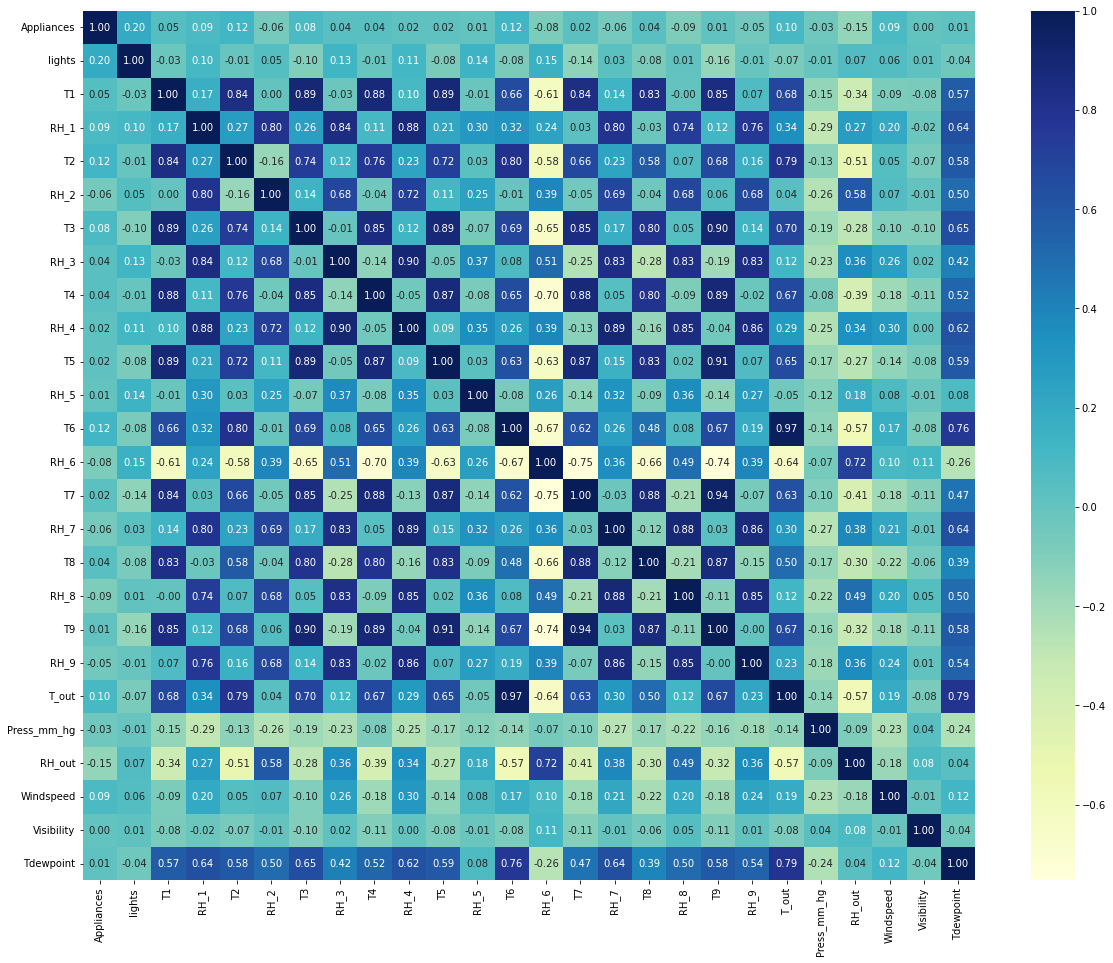

In [10]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.show()

Корреляция между целевым и всеми остальными признаками очень маленькая. Разве что есть неплохая зависимость от `lights`, `RH_out` и `T2`. А если взять все признаки, то большинство признаков хорошо коррелируют между собой

### Выделение целевого признака и предикторов

Выбросим столбцы корреляция которых меньше 0.07, потому что данные признаки скорее  будут мешать построить нормальную модель

In [11]:
df.corr()['Appliances']

Appliances     1.000000
lights         0.197802
T1             0.054210
RH_1           0.085977
T2             0.120037
RH_2          -0.061040
T3             0.084494
RH_3           0.035304
T4             0.040507
RH_4           0.016675
T5             0.018755
RH_5           0.006815
T6             0.117689
RH_6          -0.083086
T7             0.024906
RH_7          -0.056254
T8             0.038814
RH_8          -0.093442
T9             0.009514
RH_9          -0.050918
T_out          0.098798
Press_mm_hg   -0.033957
RH_out        -0.153034
Windspeed      0.085652
Visibility     0.001005
Tdewpoint      0.014559
Name: Appliances, dtype: float64

In [12]:
X = df.drop(['date', 'Appliances', 'T1', 'RH_2', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T7', 
             'RH_7', 'T8', 'T9', 'RH_9', 'Press_mm_hg', 'Visibility', 'Tdewpoint',
            ], axis=1)
y = df['Appliances']

In [13]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

### Разделение данных на обучающую и тестовую выборки

In [14]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.1)

In [15]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16684, 10), (16684,), (1854, 10), (1854,))

### Использование моделей

In [16]:
def metrics(X_test, y_test, y_pred, clf):
    print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
    print(f'MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
    print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
    print(f'R^2: {clf.score(X_test, y_test)}')

In [17]:
lr = LinearRegression().fit(X_train, y_train)

In [18]:
lr.predict(X_test)

array([ 93.58937138,  59.58994098,  45.17203405, ...,  89.0849812 ,
       105.85661352, 154.23318032])

In [19]:
y_pred = lr.predict(X_test)

In [20]:
metrics(X_test, y_test, y_pred, lr)

MAE: 51.72389365732535
MSE: 8213.043223900182
RMSE: 90.62584192105572
MAPE: 0.7833161118779058
R^2: 0.13582550092483003


Видим, что модель справилась очень плохо. Скорее всего нужно будет использовать другую модель

In [21]:
ridge = Ridge(alpha=0.5).fit(X_train, y_train)
y_pred = ridge.predict(X_test)
metrics(X_test, y_test, y_pred, ridge)

MAE: 51.72273137526068
MSE: 8213.077522214557
RMSE: 90.6260311511795
MAPE: 0.7833049457228758
R^2: 0.1358218920641634


In [22]:
lasso = Lasso(alpha=0.5).fit(X_train, y_train)
y_pred = lasso.predict(X_test)
metrics(X_test, y_test, y_pred, lasso)

MAE: 51.61795969706783
MSE: 8267.48770750806
RMSE: 90.92572632378617
MAPE: 0.78269210373958
R^2: 0.13009686501404727


Все 3 модели очень плохо себя показали на данном наборе данных. Возможно потому что линейная регрессия плохо работает в n-мерной пространстве и все предикторы слабо коррелируют с целевым признаком. Я думаю, что для данной задачи лучше подойдут деревья решений или нейронные сети

In [23]:
param = {'alpha' : np.arange(0, 1, 0.1), 'max_iter' : np.arange(100, 3000, 100)}

In [24]:
ridge_optimal = GridSearchCV(Ridge(), param).fit(X_train, y_train)
# выводим оптимальные значения параметров
ridge_optimal.best_params_

{'alpha': 0.9, 'max_iter': 100}

In [25]:
y_pred = ridge_optimal.predict(X_test)
metrics(X_test, y_test, y_pred, ridge_optimal)

MAE: 51.72180384731904
MSE: 8213.105291696764
RMSE: 90.62618436024306
MAPE: 0.7832960370684027
R^2: 0.1358189701657


Даже после подбора оптимальных параметров R^2 метрика практически не изменилась

In [26]:
pf = PolynomialFeatures()
X_poly = pf.fit_transform(X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2)

In [28]:
X_train.shape, X_test.shape, y_train.shape 

((14830, 66), (3708, 66), (14830,))

In [29]:
ridge = Ridge(alpha=0.9, max_iter=100).fit(X_train, y_train)
y_pred = ridge.predict(X_test)
metrics(X_test, y_test, y_pred, ridge)

MAE: 51.64953208770826
MSE: 8374.971884797005
RMSE: 91.5148724787234
MAPE: 0.7684912883092457
R^2: 0.17025217547944216


In [30]:
lasso = Lasso(alpha=0.9).fit(X_train, y_train)
y_pred = lasso.predict(X_test)
metrics(X_test, y_test, y_pred, lasso)

MAE: 52.486721078265234
MSE: 8519.903164543148
RMSE: 92.30332152497627
MAPE: 0.7757414935860605
R^2: 0.15589315246079272


C:\Users\Кирилл\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.417e+07, tolerance: 1.574e+04
  model = cd_fast.enet_coordinate_descent(


Из всех 3 алгоритмов, если смотресть по R^2, то лучший результат показывает Ridge

In [31]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler()), ('poli', PolynomialFeatures()), ('ridge', Ridge())])

pipe.fit(X_train, y_train).score(X_test, y_test)

0.2381269585727711

У конвейера точность оказалась лучше примерно на 1.5 от лучшего результата, что очень хорошо.

Далее найдём количество унакальных значений для каждого столбца чтобы в дальнейшем сделать кодирование.

In [32]:
for i in df.columns:
    print(i, len(df[i].unique()))

date 18538
Appliances 91
lights 8
T1 697
RH_1 2463
T2 1600
RH_2 3255
T3 1379
RH_3 2526
T4 1355
RH_4 2901
T5 2188
RH_5 7204
T6 4295
RH_6 9321
T7 1892
RH_7 5657
T8 2170
RH_8 6376
T9 903
RH_9 3281
T_out 1046
Press_mm_hg 2168
RH_out 553
Windspeed 182
Visibility 406
Tdewpoint 1110


`OneHotEncoder` я буду использовать только для столбца `lights`, так как там находятся категориальные признаки

In [33]:
X = df.drop(['date', 'Appliances', 'T1', 'RH_2', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T7', 
             'RH_7', 'T8', 'T9', 'RH_9', 'Press_mm_hg', 'Visibility', 'Tdewpoint',
            ], axis=1)
y = df['Appliances']

In [34]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
col = ['n_0', 'n_1', 'n_2', 'n_3', 'n_4', 'n_5', 'n_6', 'n_7']
df_enc = pd.DataFrame(enc.fit_transform(X[['lights']]).toarray(), columns=col)
df_enc

,n_0,n_1,n_2,n_3,n_4,n_5,n_6,n_7
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
18533,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18534,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18535,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
18536,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
X = X.join(df_enc)

In [36]:
X.drop('lights', axis=1, inplace=True )

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [38]:
from sklearn.linear_model import ElasticNet

In [39]:
base_elastic_model = ElasticNet(random_state=42, max_iter=10000)

In [40]:
base_elastic_model.fit(X_train, y_train)

ElasticNet(max_iter=10000, random_state=42)

In [41]:
y_pred = base_elastic_model.predict(X_test)
metrics(X_test, y_test, y_pred, base_elastic_model)

MAE: 58.082919723285904
MSE: 10893.945060491056
RMSE: 104.3740631598246
MAPE: 0.8060738014742921
R^2: 0.10569064796829064


Реализация всех используемых метрик ручками.

In [42]:
def new_metrics(y_test, y_pred):
    m = y_pred.shape[0]
    print(f'MAE: {np.sum(np.abs(y_test.values - y_pred)) / m}')
    mse = np.sum(np.power(y_test.values - y_pred, 2)) / m
    print(f'MSE: {mse}')
    print(f'RMSE: {np.sqrt(mse)}')
    print(f'MAPE: {np.sum(np.abs((y_test.values - y_pred) / y_test.values)) / m}')
    y_test_mean = np.sum(y_pred) / m
    print(f'R^2: {1 - mse / np.sum(np.power(y_test.values - y_test_mean, 2)) * m}')

new_metrics(y_test, y_pred)

MAE: 58.082919723285904
MSE: 10893.945060491056
RMSE: 104.3740631598246
MAPE: 0.6497549734232165
R^2: 0.10712604019211414


Реализация `ElasticNet` ручками.

In [43]:
def normalization(X):
    return (X - X.min()) / (X.max() - X.min())

In [44]:
X_train, X_test, y_train, y_test = train_test_split(normalization(X), y, test_size=0.2)

In [71]:
def elasticNet(X_train, y_train, X_test, y_test, epoch = 3, theta = 0.1, l1_ratio = 0.5):
    n, m = X_train.shape
    w = np.random.randn(m,)
    dict_pred_w = {}
    for epo in range(epoch):
        for i in range(n):
            random_row = np.random.randint(n)
            xi = X_train[random_row : random_row + 1]
            yi = y_train[random_row : random_row + 1]
            mulct = theta * l1_ratio * np.sum(np.abs(w)) + theta * (1 - l1_ratio) / 2 * np.sum(np.power(w, 2))
            grad = 2 * xi.T.dot(xi.dot(w).values[0] - yi)
            w = w - theta * grad + mulct
            
            y_pred = X_test.dot(w)
            k = y_pred.shape[0]
            mse = np.sum(np.power(y_test.values - y_pred, 2)) / k
            y_test_mean = np.sum(y_pred) / k
            dict_pred_w.update({1 - mse / np.sum(np.power(y_test.values - y_test_mean, 2)) * k : w})
    return dict_pred_w

In [72]:
dict_pred_w = elasticNet(X_train, y_train, X_test, y_test)

In [73]:
best_pred = max(dict_pred_w.keys())
best_w = dict_pred_w[best_pred]

In [74]:
new_metrics(y_test, X_test.dot(best_w))

MAE: 52.965218792078375
MSE: 10318.769091645507
RMSE: 101.58134224179905
MAPE: 0.5345631964826347
R^2: 0.10210638163494057
